In [1]:
import pandas as pd
import matplotlib as mb
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',100)
Data = pd.read_excel("Otw4_mgr.xlsx")

In [4]:
Labeleddata = Data.dropna()


In [5]:
Labeleddata_withr8index = Labeleddata.reset_index(drop=True)
test_row = Labeleddata_withr8index.iloc[5]
R8data= Labeleddata_withr8index.drop(5)
R8data = R8data.reset_index(drop=True)
#R8data data with H and H lab and without extracted row with index 50 in labeled data and index 5 with reset_index
TOC = R8data["TOC[%]"]
R8data = R8data.drop(columns=["H", "H (lab.)","TOC[%]"])
TOC_row5=test_row["TOC[%]"]

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(R8data,TOC)

linear_regression = Lasso()
linear_regression.fit(X=X_train, y=y_train)
prognoza = linear_regression.predict(X_test)
oczekiwane = y_test
while(metrics.r2_score(oczekiwane,prognoza)) < 0.95:
    X_train, X_test, y_train, y_test = train_test_split(R8data,TOC)
    prognoza = linear_regression.predict(X_test)
    oczekiwane = y_test
    linear_regression = Lasso()
    linear_regression.fit(X=X_train, y=y_train)
    for i,name in enumerate(R8data.columns):
        print(f'{name:>10}: {linear_regression.coef_[i]}')
    print("Linear regression b parameter ",linear_regression.intercept_)
    prognoza = linear_regression.predict(X_test)
    oczekiwane = y_test
    print(metrics.r2_score(oczekiwane,prognoza),metrics.mean_squared_error(oczekiwane,prognoza),)

      DCAL: 0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: 0.0
  Vkerogen: 0.0
       VCL: -0.0
       PHI: 0.0
       CAL: -0.0
        DT: 0.0
       ILD: 0.06298282627678577
       LL3: -0.0
   GG_Corr: 0.023887817498142984
        GR: 0.013928237504065341
  GRS_Corr: 0.02285619050562068
  NPHICorr: 0.0
      POTA: -0.0
      THOR: 0.0
      URAN: -0.0
      RHOB: -0.0
Linear regression b parameter  -9.272881381954265
-0.11189130430712146 1.3560324352160584
      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0
       PHI: 0.0
       CAL: -0.0
        DT: 0.0
       ILD: 0.0
       LL3: -0.0
   GG_Corr: 0.0249554285409368
        GR: 0.02473023618815367
  GRS_Corr: -0.0
  NPHICorr: 0.0
      POTA: -0.0
      THOR: -0.0
      URAN: 0.0
      RHOB: -0.0
Linear regression b parameter  -7.324820680275343
0.8562911252424474 2.3399129630668996
      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0


      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0
       PHI: 0.0
       CAL: -0.0
        DT: 0.0
       ILD: 0.057080998331273905
       LL3: -0.0
   GG_Corr: 0.03684886839658614
        GR: 0.004283935568078528
  GRS_Corr: 0.0047796543897441
  NPHICorr: 0.0
      POTA: -0.0
      THOR: 0.0
      URAN: -0.0
      RHOB: -0.0
Linear regression b parameter  -7.165442714446193
-0.6949380830236924 0.3279558714520213
      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0
       PHI: 0.0
       CAL: -0.0
        DT: 0.0
       ILD: 0.0841494972105649
       LL3: 0.0
   GG_Corr: 0.03590533194622241
        GR: -0.0
  GRS_Corr: 0.0
  NPHICorr: 0.0
      POTA: -0.0
      THOR: -0.0
      URAN: 0.0
      RHOB: -0.0
Linear regression b parameter  -5.813742047906981
0.8849126709531963 1.7019600143719535
      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0
 

0.9568765168089892 0.24728538541127915


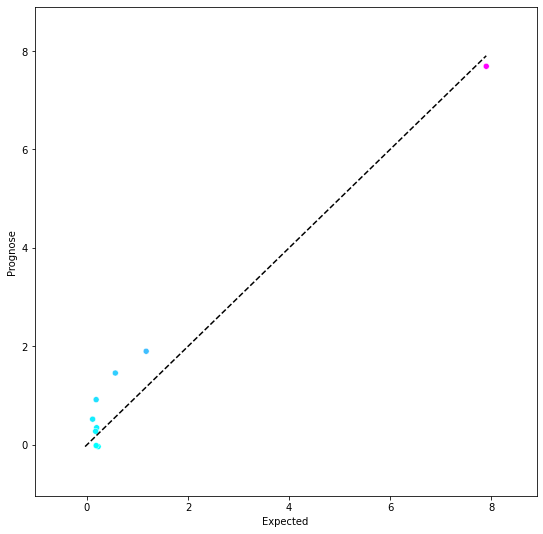

In [10]:
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(x=oczekiwane,y = prognoza,hue = prognoza,palette="cool",legend = False)
axes.set(xlabel='Expected', ylabel='Prognose')
start = min(oczekiwane.min(),prognoza.min())
end = max(oczekiwane.max(),prognoza.max())
axes.set_xlim(start-1,end+1)
axes.set_ylim(start-1,end+1)
line = plt.plot([start,end],[start,end],"k--")
print(metrics.r2_score(oczekiwane,prognoza),metrics.mean_squared_error(oczekiwane,prognoza))

In [11]:
model_data = Data.drop(columns=["H", "H (lab.)","TOC[%]"])
linear_regression.predict(model_data.iloc[50].values.reshape(1,-1))
#here lasso end value should be 2.05

array([0.05525366])